In [1]:
import json

import numpy as np
import pandas as pd
from bidict import bidict
from keras.src.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
with open("../config.json") as json_data_file:
    general_config = json.load(json_data_file)

dataset_path = general_config["IRMAS_Training_Path"]

In [3]:
df = pd.read_csv("../statistics/irmas_complete_features_novoice.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,E:\LICENTA\IRMAS-TrainingData\cel\008__[cel][n...,66150,0.270868,0.088779,0.005637,0.000007,1184.848700,44151.458383,1475.274681,11405.120436,...,83.682045,0.766090,184.533540,0.564403,78.078790,2.870522,177.32228,15.919999,295.226380,cel
1,E:\LICENTA\IRMAS-TrainingData\cel\008__[cel][n...,66150,0.236861,0.086016,0.009957,0.000021,1296.523498,73440.809268,1576.413359,25165.223508,...,99.066635,19.695475,26.513596,14.918323,181.133500,4.177779,365.71380,8.915889,410.341460,cel
2,E:\LICENTA\IRMAS-TrainingData\cel\008__[cel][n...,66150,0.197911,0.085117,0.015928,0.000055,1441.664976,39565.763870,1627.217118,29168.206546,...,191.040530,-1.480464,181.601350,12.298854,519.525300,12.296498,527.86566,26.161470,332.923370,cel
3,E:\LICENTA\IRMAS-TrainingData\cel\012__[cel][n...,66150,0.292965,0.079319,0.017609,0.000051,1615.407735,117103.293989,1879.968315,63381.025638,...,39.805428,-3.508630,61.954140,-3.650985,42.664340,-2.520590,36.20382,5.156085,87.654310,cel
4,E:\LICENTA\IRMAS-TrainingData\cel\012__[cel][n...,66150,0.234136,0.084589,0.020054,0.000055,1758.006123,140585.212007,1952.732500,82086.931710,...,58.869194,1.363143,70.448590,-1.200910,116.854385,2.161374,92.96115,11.406509,42.581726,cel


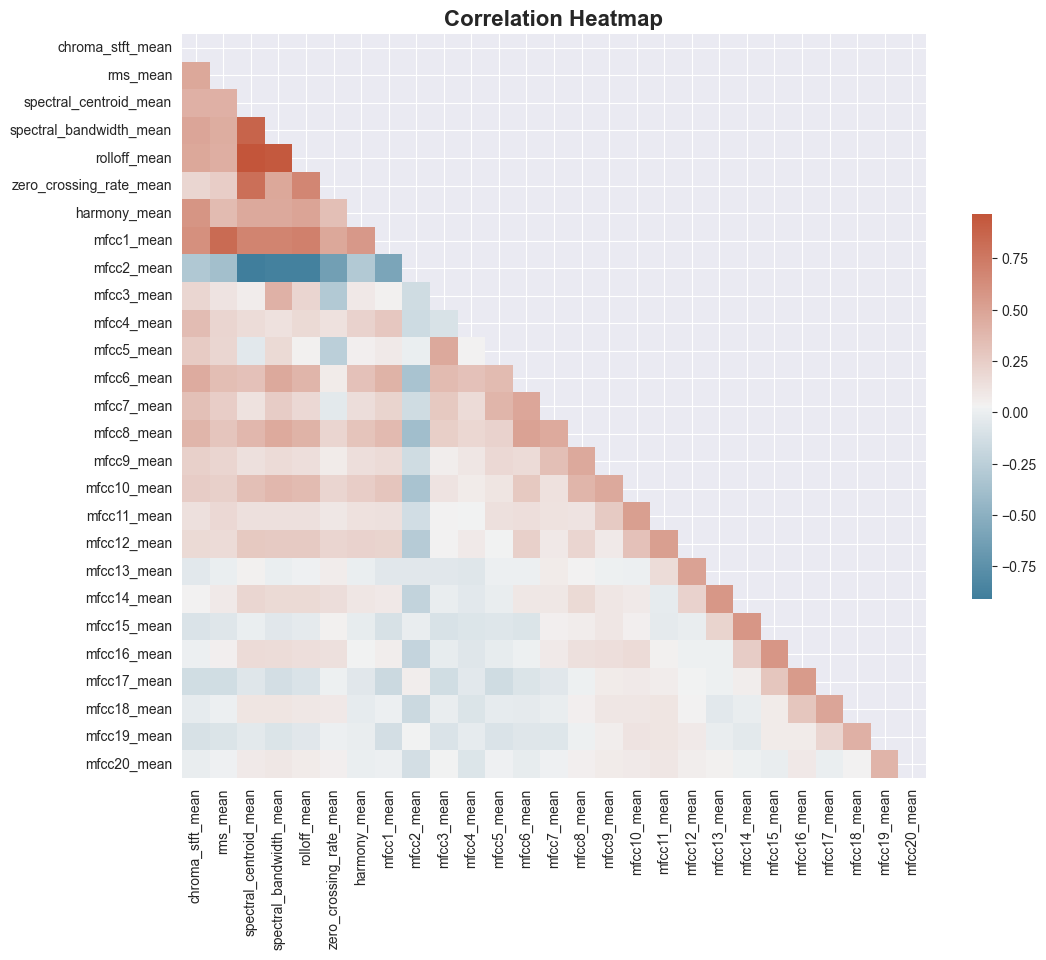

In [4]:
mean_columns = df.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, linewidths=0,
            cbar_kws={"shrink": .5}, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

Text(0, 0.5, 'Second Principal Component')

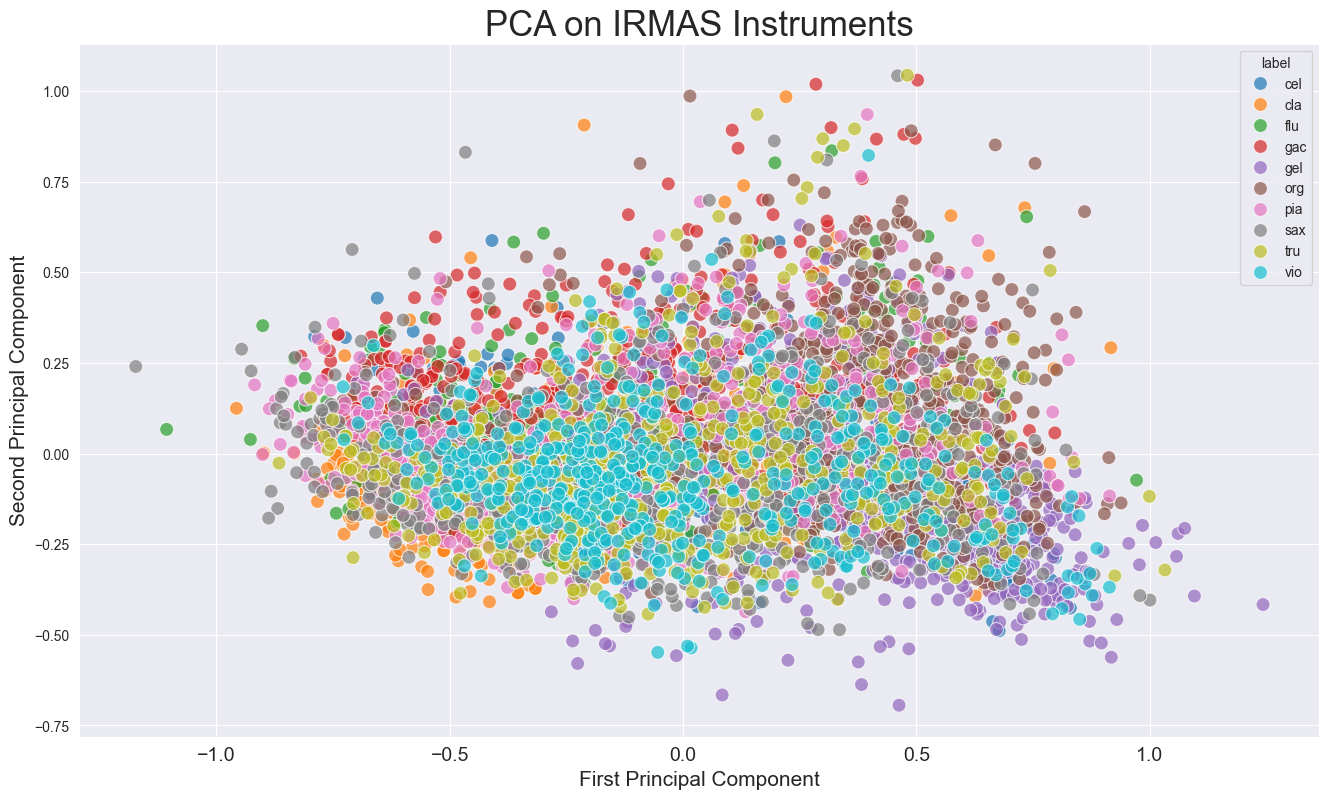

In [5]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']


#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on IRMAS Instruments', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("First Principal Component", fontsize = 15)
plt.ylabel("Second Principal Component", fontsize = 15)